In [67]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
#import dataset in pandas
df = pd.read_csv("/content/diabetes.csv")

In [69]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [70]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [91]:
#checking if the data contains any null values
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [92]:
#splitting the data
from sklearn.model_selection import train_test_split
x=df.iloc[:,:8]
y=df.iloc[:,8:]
print(x.head())
print(y.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  
   Outcome
0        1
1        0
2        1
3        0
4        1


In [73]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [93]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
print(X_train)

[[-0.52639686 -1.15139792 -3.75268255 ... -4.13525578 -0.49073479
  -1.03594038]
 [ 1.58804586 -0.27664283  0.68034485 ... -0.48916881  2.41502991
   1.48710085]
 [-0.82846011  0.56687102 -1.2658623  ... -0.42452187  0.54916055
  -0.94893896]
 ...
 [ 1.8901091  -0.62029661  0.89659009 ...  1.76054443  1.981245
   0.44308379]
 [-1.13052335  0.62935353 -3.75268255 ...  1.34680407 -0.78487662
  -0.33992901]
 [-1.13052335  0.12949347  1.43720319 ... -1.22614383 -0.61552223
  -1.03594038]]


In [75]:
# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(criterion='entropy',max_depth=2)
tree_clf.fit(X_train,y_train)
y_pred=tree_clf.predict(X_test)

In [94]:
#importing the accuracy and confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix


In [96]:
#printing the accuracy
accuracy = round(accuracy_score(y_test, y_pred)*100)
print(f"accuracy: {accuracy}")

accuracy: 77


In [97]:
#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[86 13]
 [23 32]]


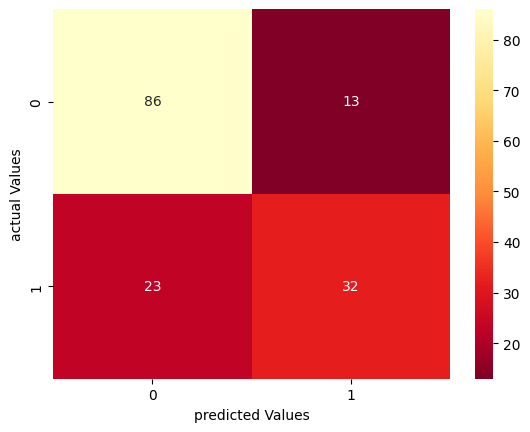

In [82]:
sns.heatmap(cm, annot= True, cmap = 'YlOrRd_r')
plt.xlabel("predicted Values")
plt.ylabel("actual Values")
plt.show()

[Text(0.5, 0.8333333333333334, 'x[1] <= 0.208\nentropy = 0.931\nsamples = 614\nvalue = [401, 213]'),
 Text(0.25, 0.5, 'x[7] <= -0.383\nentropy = 0.712\nsamples = 390\nvalue = [314, 76]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.391\nsamples = 221\nvalue = [204, 17]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.933\nsamples = 169\nvalue = [110, 59]'),
 Text(0.75, 0.5, 'x[5] <= -0.263\nentropy = 0.964\nsamples = 224\nvalue = [87, 137]'),
 Text(0.625, 0.16666666666666666, 'entropy = 0.895\nsamples = 61\nvalue = [42, 19]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.85\nsamples = 163\nvalue = [45, 118]')]

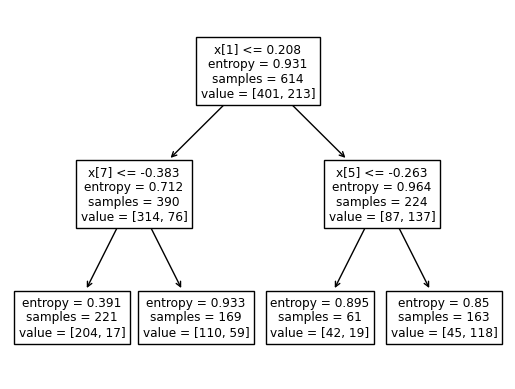

In [83]:
#plotting the tree
from sklearn import tree
tree.plot_tree(tree_clf)

In [89]:
#predicting the output for the given data
output=clf.predict([[6,148,72,35,0,33.6,0.627,50]])
if output==1:
  print("The patient is diabetic, according to the  given input ")
else:
  print("the patient is not diabetic")

The patient is diabetic, according to the  given input 
